## Analysing the IEEE Dataset https://github.com/ieee8023/covid-chestxray-dataset

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import data
metadata_dir = '/home/nicolas_acosta2021/BMEN4460/final_project/metadata.csv'
metadata = pd.read_csv(metadata_dir)
# what info do we have?
print(metadata.columns)

Index(['patientid', 'offset', 'sex', 'age', 'finding', 'survival', 'intubated',
       'intubation_present', 'went_icu', 'needed_supplemental_O2', 'extubated',
       'temperature', 'pO2_saturation', 'leukocyte_count', 'neutrophil_count',
       'lymphocyte_count', 'view', 'modality', 'date', 'location', 'folder',
       'filename', 'doi', 'url', 'license', 'clinical_notes', 'other_notes',
       'Unnamed: 27'],
      dtype='object')


## Plot some readily available values ( ***nan*** where data is unknown)

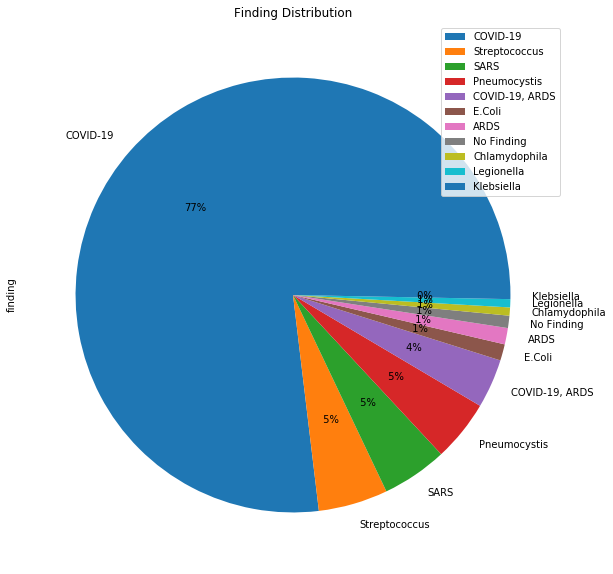

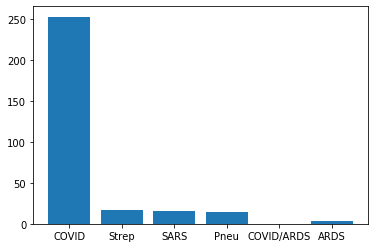

[253, 17, 16, 15, 0, 4]


In [64]:
# Finding distribution (nan if unknown)
ax = metadata['finding'].value_counts(dropna=False).plot.pie(y='Finding', legend = True, autopct='%2.0f%%', figsize = (10,10), title = 'Finding Distribution')
# Finding How many of each 
covid = 0
strep = 0 
SARS = 0
pneumocystis = 0 
covid_ards = 0
ARDS = 0

for i in range(len(metadata['finding'])):
    if metadata['finding'][i] == 'COVID-19':
        covid+=1
    if metadata['finding'][i] == 'Streptococcus':
        strep+=1
    if metadata['finding'][i] == 'SARS':
        SARS+=1
    if metadata['finding'][i] == 'Pneumocystis':
        pneumocystis+=1
    if metadata['finding'][i] == 'COVID, ARDS':
        covid_ards+=1
    if metadata['finding'][i] == 'ARDS':
        ARDS+=1
        
results = [covid,strep,SARS,pneumocystis,covid_ards,ARDS]
results

# Plotting
fig1 = plt.figure()
plt.xlabel = 'Findings'
plt.ylabel = 'Number of Images'
labels = ['COVID','Strep','SARS','Pneu','COVID/ARDS','ARDS']
plt.bar(labels,results)
plt.show()

print(results)


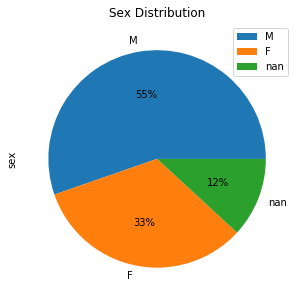

In [53]:
# Sex distribution (nan if unknown)
ax = metadata['sex'].value_counts(dropna=False).plot.pie(y='sex', legend = True, autopct='%2.0f%%', figsize = (5,5), title = 'Sex Distribution')

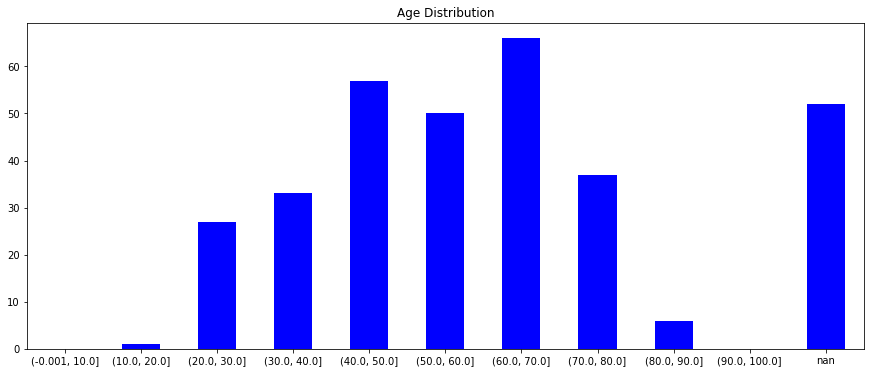

In [54]:
# Now age (nan in unknown)
out = pd.cut(metadata['age'], bins=np.arange(0,110,10).tolist(), include_lowest=True)
ax = out.value_counts(sort=False, dropna=False).plot.bar(rot=0, color="b", figsize=(15,6), title= "Age Distribution")
#ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.show()

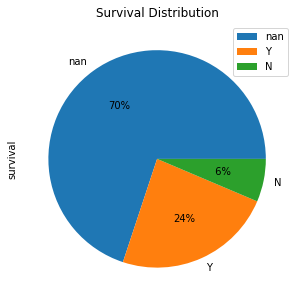

In [55]:
# Survival 
ax = metadata['survival'].value_counts(dropna=False).plot.pie(y='survival', legend = True, autopct='%2.0f%%', figsize = (5,5), title = 'Survival Distribution')

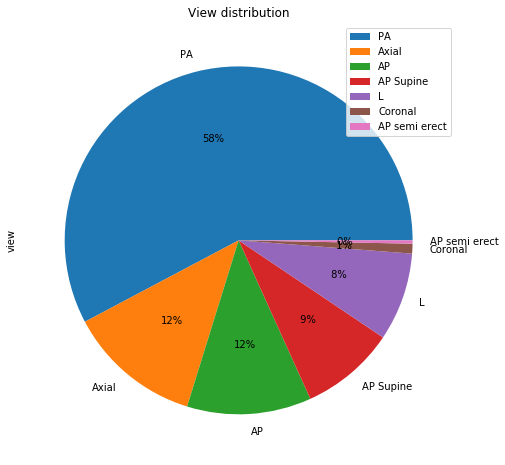

In [56]:
# View
ax = metadata['view'].value_counts(dropna=False).plot.pie(y='view', legend = True, autopct='%2.0f%%', figsize = (8,8), title = 'View distribution')

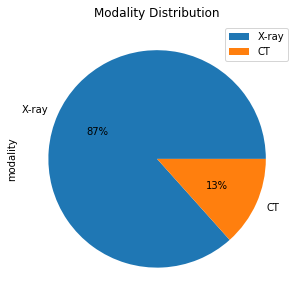

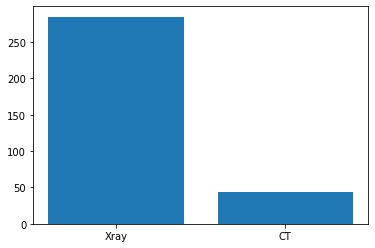

[285, 44]


In [65]:
# Modality
ax = metadata['modality'].value_counts(dropna=False).plot.pie(y='modality', legend = True, autopct='%2.0f%%', figsize = (5,5), title = 'Modality Distribution')
plt.show()

# How much of each?
xray =0
ct = 0
for i in range(len(metadata['modality'])):
    if metadata['modality'][i] == 'X-ray':
        xray +=1
    if metadata['modality'][i]== 'CT':
        ct +=1
res = [xray,ct]
label = ["Xray","CT"]
fig2 = plt.figure()
plt.xlabel= 'Label'
plt.ylabel= 'Number of Images Using this Modality'
plt.bar(label,res)
plt.show()
print(res)